# Top sights Palma model

In [1]:
import os
os.chdir('../')
print(os.getcwd())

/home/mariadelmar/documents/madm/tfm/code/cruiseshiptourism


In [2]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tourist import Tourist 
import tasks as tsk
from vincenty import vincenty
import unidecode

First, read the csv with google palma points of interest.

In [88]:
topsights = pd.read_csv(
            "palmadata/palmapointsofinterest.csv", 
            header = 0,
            dtype = {
                "name": 'str',
                "description": 'str',
                "latitude": 'float',
                "longitude": 'float',
                "stars": 'float',
                "reviews": 'float'
            }
        )

Add cruise ship location into topsights dataframe.  <br> Index must be 0.

In [89]:
shiprow = {"name": ["cruise ship"], 
           "description": ["tourist cruise ship"],
           "latitude": [39.568276],
           "longitude": [2.637640],
           "stars": [0], 
           "reviews": [0]}

shipdf = pd\
    .DataFrame(data=shiprow)\
    .astype(dtype={
                "name": "str",
                "description": "str",
                "latitude": "float",
                "longitude": "float",
                "stars": "float",
                "reviews": "float"
            })

topsights = pd.concat([shipdf,topsights]).reset_index(drop=True)

In [97]:
pd.set_option('display.max_rows', None)

In [98]:
topsights

,name,description,latitude,longitude,stars,reviews
0,cruise ship,tourist cruise ship,39.568276,2.637640,0.000000,0.0
1,Catedral-Basílica de Santa María de Mallorca,Gothic place of worship on the seafront,39.567425,2.648299,4.674750,31176.0
2,Castell de Bellver,Hilltop 1300s castle for panoramic views,39.563814,2.619354,4.436243,10446.0
3,Royal Palace of La Almudaina,Historic palace of the Royal Family,39.567886,2.647022,4.420346,2310.0
4,Palma Aquarium,Aquarium with huge shark-viewing tank,39.531374,2.729529,4.367786,14764.0
5,Tren Soller,Scenic electric railway dating to 1912,39.576665,2.653782,4.396561,5757.0
6,Es Baluard Museu d'Art Contemporani de Palma,Modern & contemporary art collection,39.570139,2.641112,4.257859,2513.0
7,Plaza Mayor,Historic public square with craft market,39.571371,2.651813,4.244744,21071.0
8,Santuari de Lluc,Historic sanctuary & pilgrimage site,39.822118,2.884384,4.381493,4139.0
9,Poble Espanyol de Palma,Venue with recreated Spanish landmarks,39.572720,2.627968,4.057202,2430.0


## Locations

There are locations outside from Palma. These locations must be removed.

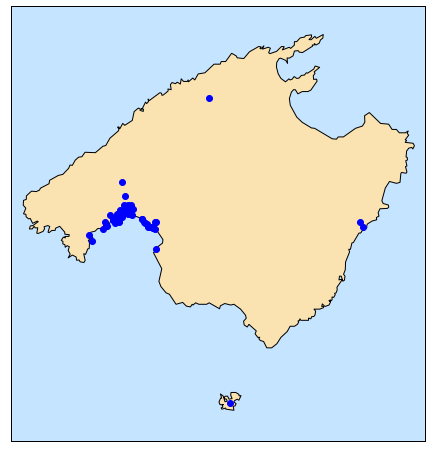

In [6]:
# values
latitude = topsights['latitude'].values
longitude = topsights['longitude'].values

# Map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(
            projection='merc', resolution='h',
            llcrnrlat=39.055777,  # The lower left corner geographical latitude
            llcrnrlon=2.310797,   # The lower left corner geographical longitude
            urcrnrlat=40.025957,  # The upper right corner geographical latitude
            urcrnrlon=3.508145   # The upper right corner geographical longitude
        )

m.drawcoastlines()
m.drawmapboundary(fill_color='#C5E4FF')
m.fillcontinents(color='#FAE2B1')

# scatter data,color by stars, size by reviews
m.scatter(longitude, latitude, latlon=True,
          color='blue', alpha=1, zorder=10)

Define center of Palma and maximum distance from this point.

In [6]:
center = {"name":"center of Palma",
          "latitude": 39.579883,
          "longitude": 2.651031}
bellvercastle = topsights[topsights["name"]=="Castell de Bellver"]

maxdist = vincenty((center["latitude"], center["longitude"]),
                   (bellvercastle.latitude.values, bellvercastle.longitude.values),
                   miles=False)

inpalma = [vincenty((center["latitude"], center["longitude"]), (p1,p2), miles=False) <= maxdist 
           for (p1,p2) in list(zip(topsights.latitude.values, topsights.longitude.values))]

topsightspalma = topsights[inpalma]

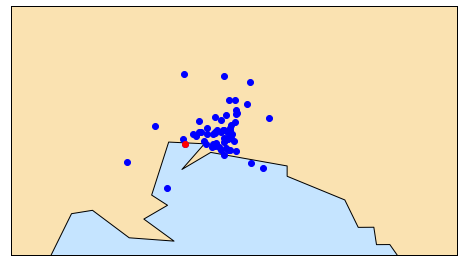

In [8]:
# values
latitude = topsightspalma.latitude.values
longitude = topsightspalma.longitude.values

# Map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(
            projection='merc', resolution='h',
            llcrnrlat=39.541089, # The lower left corner geographical latitude
            llcrnrlon=2.582399,   # The lower left corner geographical longitude
            urcrnrlat=39.601874,  # The upper right corner geographical latitude
            urcrnrlon=2.723818 # The upper right corner geographical longitude
        )

m.drawcoastlines()
m.drawmapboundary(fill_color='#C5E4FF')
m.fillcontinents(color='#FAE2B1')

# scatter data,color by stars, size by reviews
m.scatter(longitude, latitude, latlon=True,
          color='blue', alpha=1, zorder=10)

m.scatter(longitude[0], latitude[0], latlon=True,
          color="red", alpha=1, zorder=10)

## Utility

In [7]:
topsightspalma.head()

,name,description,latitude,longitude,stars,reviews
0,cruise ship,tourist cruise ship,39.568276,2.637640,0.000000,0.0
1,Catedral-Basílica de Santa María de Mallorca,Gothic place of worship on the seafront,39.567425,2.648299,4.674750,31176.0
2,Castell de Bellver,Hilltop 1300s castle for panoramic views,39.563814,2.619354,4.436243,10446.0
3,Royal Palace of La Almudaina,Historic palace of the Royal Family,39.567886,2.647022,4.420346,2310.0
5,Tren Soller,Scenic electric railway dating to 1912,39.576665,2.653782,4.396561,5757.0


In [8]:
maxreviews = topsightspalma.reviews.max()

Define utility as a sum between stars and reviews.

In [9]:
def utility(stars, reviews, maxreviews, alpha=0.5):
    return alpha*stars/5 + (1-alpha)*reviews/maxreviews

In [10]:
utilitycol = topsightspalma.apply(lambda row: utility(row.stars, row.reviews, maxreviews), axis=1)
topsightspalma = topsightspalma.assign(utility=utilitycol.values)

Drop rows with empty latitude and longitude.

In [11]:
topsightspalma = topsightspalma.dropna(subset=["latitude", "longitude"])

In [12]:
topsightspalma.shape

(62, 7)

check rows with empty stars and reviews.

In [13]:
emptyutility = topsightspalma[topsightspalma.loc[:,["stars", "reviews"]].isna().all(axis=1)].loc[:,["name"]]

In [15]:
emptyutility

,name
11,Born de Palma
19,Plaza Mayor de Palma de Mallorca
30,Paseo Marítimo (Palma de Mallorca)
37,Plaza de España
39,Gran Hotel
41,Rambla de Palma
50,Avenida Jaime III
60,Passeig Mallorca
89,Plaça del Rei Joan Carles I
90,tapas-tour


In [102]:
likename = [["born"], ["mayor", "major"], ["marítimo", "marítim", "puerto", "port"], ["españa", "spain", "espanya"],
            ["gran"], ["rambla", "rambles", "ramblas"], ["jaume", "jaime"], ["passeig", "paseo", "riera"],
            ["joan", "juan"], ["tapas"]]
emptyutility["likename"] = likename
emptyutility["topsnames"]=[None]*emptyutility["name"].count()

In [139]:
def compare(likenames, alltopsnames):
    liketopnames = []
    for name in likenames:
        name = unidecode.unidecode(name.lower())
        boollist = [name in unidecode.unidecode(str_.lower()) for str_ in alltopsnames]
        ls = [x for x,y in zip(alltopsnames, boollist) if y==True]
        if ls: liketopnames.append(ls)
    if liketopnames:
        return sum(liketopnames, [])
    else:
        return None

In [61]:
alltopsnames = topsightspalma.dropna()["name"].tolist()
emptyutility["topsnames"] = emptyutility.apply(lambda row: compare(row["likename"], alltopsnames), axis=1)

In [150]:
emptyutility

,name,likename,topsnames
11,Born de Palma,[born],None
19,Plaza Mayor de Palma de Mallorca,"[mayor, major]","[Plaza Mayor, Roman Catholic Diocese of Majorca]"
30,Paseo Marítimo (Palma de Mallorca),"[marítimo, marítim, puerto, port]",[Port of Palma de Mallorca]
37,Plaza de España,"[españa, spain, espanya]",[Plaza España]
39,Gran Hotel,[gran],None
41,Rambla de Palma,"[rambla, rambles, ramblas]",None
50,Avenida Jaime III,"[jaume, jaime]",None
60,Passeig Mallorca,"[passeig, paseo, riera]",[Parque Sa Riera]
89,Plaça del Rei Joan Carles I,"[joan, juan]","[Museu Fundación Juan March, Palma, Mercado Ga..."
90,tapas-tour,[tapas],None


In [152]:
emptyutility = emptyutility.drop(emptyutility.index[[1,2,3]])
emptyutility = emptyutility[["name"]

In [160]:
emptyutility

,name
11,Born de Palma
39,Gran Hotel
41,Rambla de Palma
50,Avenida Jaime III
60,Passeig Mallorca
89,Plaça del Rei Joan Carles I
90,tapas-tour
